## Análisis - Serie A temporada 2015/2016 (masculina)

Vamos a hacer un análisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que características son más importantes a la hora de tomar la decisión por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuestión, vamos a analizar la Serie A en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competición para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "Serie A"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_SerieA = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/Serie A(2015_2016_male)_reduced.csv


In [2]:
matches_in_SerieA.head(5)

,match_id,shots_on_target_ratio_home,shots_on_target_ratio_away,average_shots_on_target_distance_home,average_shots_on_target_distance_away,shots_inside_area_ratio_home,shots_inside_area_ratio_away,pass_success_ratio_home,pass_success_ratio_away,cross_success_ratio_home,...,percentage_shots_under_pressure_home,percentage_shots_inside_area_under_pressure_home,percentage_passes_under_pressure_home,percentage_passes_inside_area_under_pressure_home,percentage_set_piece_shots_home,percentage_set_piece_shots_inside_area_home,percentage_substitutions_home,percentage_tactical_substitutions_home,percentage_tactical_changes_home,percentage_formation_changes_home
0,3878548,0.285714,0.285714,16.182880,10.093019,0.619048,0.857143,0.795717,0.653614,0.407407,...,0.900000,0.888889,0.495238,0.750000,0.750000,0.642857,0.5,0.6,0.5,1.0
1,3878541,0.583333,0.285714,16.798535,18.598700,0.750000,0.523810,0.656667,0.851100,0.111111,...,0.500000,0.571429,0.478992,0.600000,0.315789,0.312500,0.5,0.4,0.5,0.5
2,3878549,0.250000,0.250000,17.663252,13.275137,0.687500,0.750000,0.792727,0.698824,0.214286,...,0.666667,0.800000,0.470588,0.333333,0.588235,0.500000,0.5,0.6,0.0,0.0
3,3878547,0.230769,0.230769,25.183344,15.573483,0.384615,0.538462,0.741514,0.785714,0.222222,...,0.285714,0.400000,0.564885,0.200000,0.280000,0.307692,0.5,0.5,1.0,1.0
4,3878546,0.352941,0.266667,14.242283,16.442821,0.705882,0.666667,0.707143,0.786885,0.214286,...,0.400000,0.444444,0.315476,0.333333,0.631579,0.666667,0.5,0.4,0.5,0.5


Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentación) y mostramos sus resultados.

In [3]:
from src.analysis import serieA_best_model


best_model_SerieA, evaluation_metrics, X_train_reduced_SerieA, X_test_reduced_SerieA, X_test_reduced_orig_SerieA, feature_names_reduced_SerieA, encoder_SerieA, match_ids_test = serieA_best_model(matches_in_SerieA)
print(f"The best model for La Liga is {best_model_SerieA}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for La Liga is LogisticRegression(C=0.9319903015590866, l1_ratio=0.3035119926400068,
                   max_iter=1000, penalty='elasticnet', random_state=42,
                   solver='saga')
The evaluation metrics for the best model are:


,Train Accuracy,Test Accuracy,Precision Macro,Precision Weighted,Recall Macro,Recall Weighted,F1 Macro,F1 Weighted
Logistic Regression MI,0.799342,0.618421,0.574374,0.611448,0.565664,0.618421,0.567402,0.612269


Una vez ya tenemos el mejor modelo entrenado comenzamos el análisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Logistic Regression, vamos a fijarnos en el coeficiente (método coef_) que nos aporta el modelo para cada característica en cada clase. 
- Con esto, estamos observando la importancia global de cada característica para cada clase en términos de una relación lineal. Es decir, estamos observando relaciones exclusivamente lineales entre las características y la predicción.
- Con esto, no se tiene en cuenta las interacciones entre características ni tampoco explica predicciones individuales.

Los gráficos que se aparecen a continuación muestran la importancia de cada característica para predecir una determinada clase de resultado en los partidos de la Serie A. Las clases son:
- Clase "away_team": Indica qué características influyen en que el equipo visitante gane el partido.
- Clase "draw": Indica qué características influyen en que el partido termine en empate.
- Clase "home_team": Indica qué características influyen en que el equipo local gane el partido.

Los valores representados en el eje X son los coeficientes de la regresión logística, que indican la magnitud e impacto de cada variable en la probabilidad de un resultado específico. Valores positivos aumentan la probabilidad de que ocurra esa clase, mientras que valores negativos disminuyen dicha probabilidad.

Class 0: ['away_team']
Features with zero importance for class away_team:
['dribbles_success_ratio_away', 'last_3_matches_form_away', 'percentage_total_shots_home', 'percentage_shots_foot_home', 'percentage_total_passes_home', 'percentage_duels_won_home', 'percentage_yellow_cards_home', 'percentage_counterpress_home', 'percentage_players_off_home', 'percentage_set_piece_shots_home', 'percentage_tactical_substitutions_home']


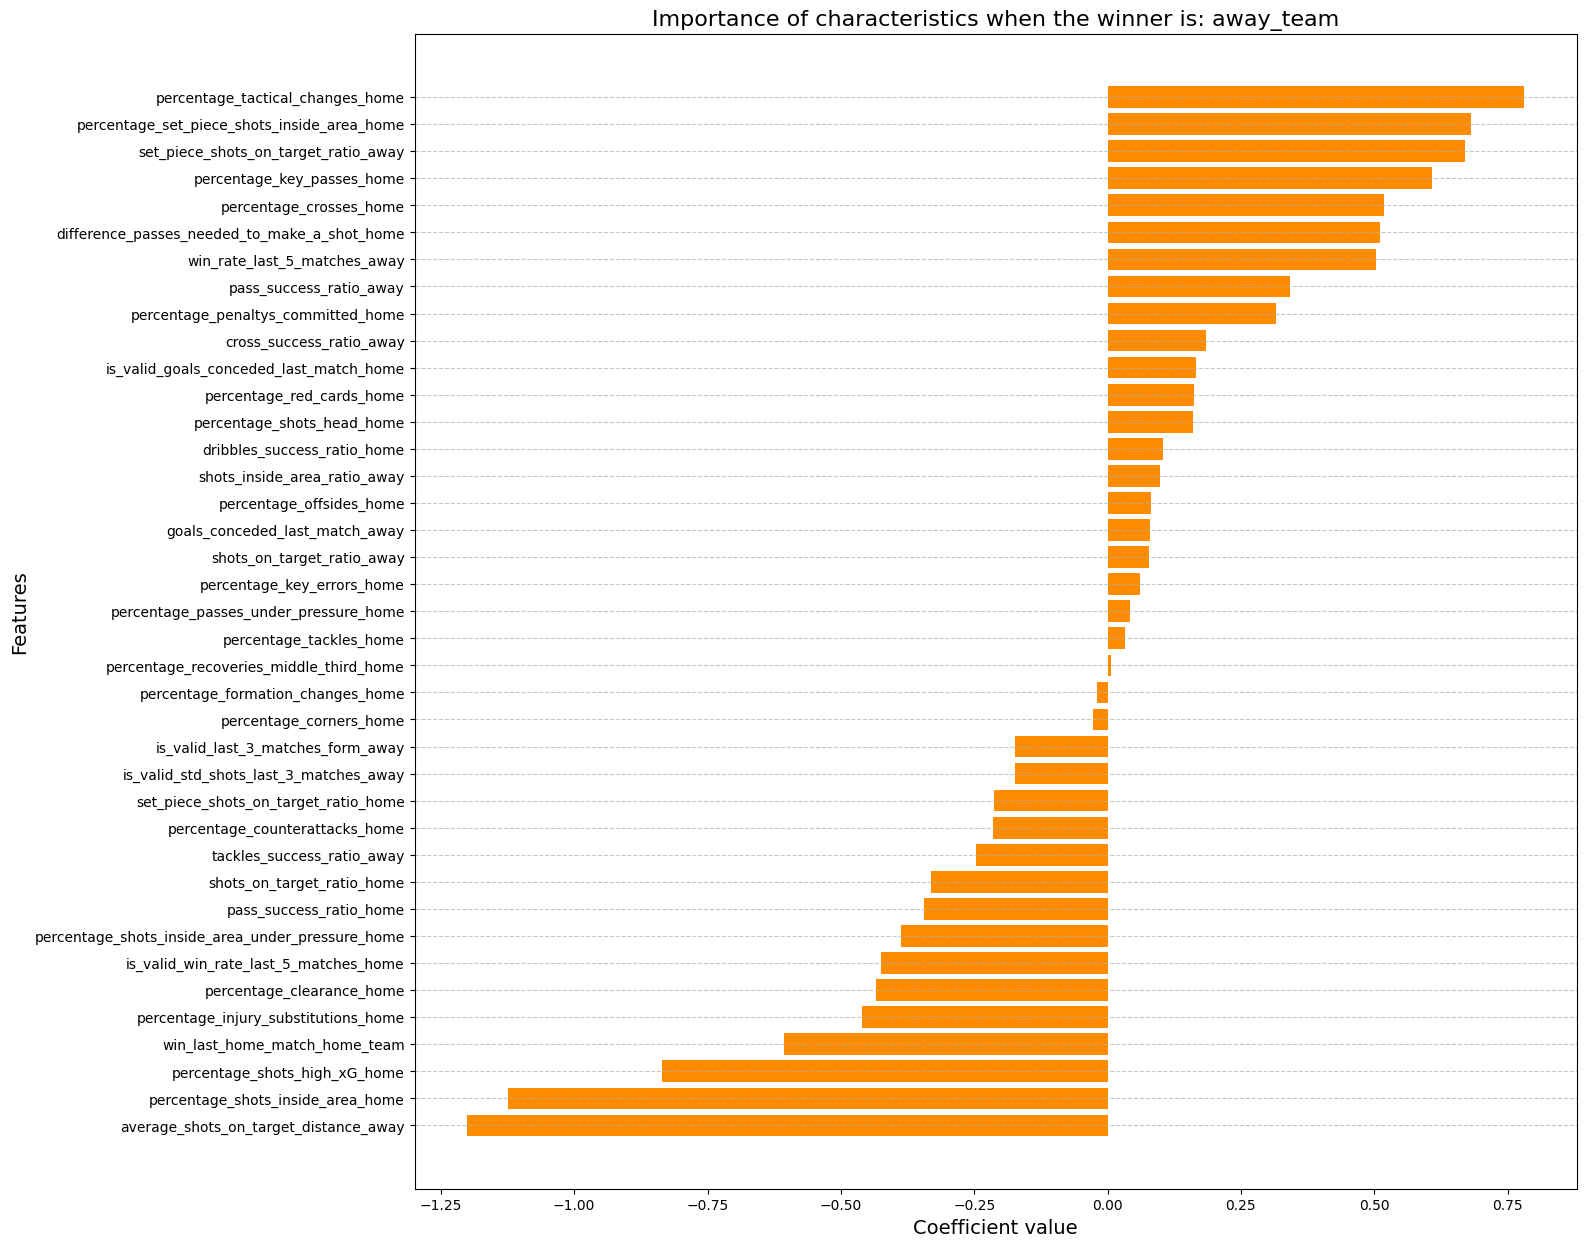

Class 1: ['draw']
Features with zero importance for class draw:
['shots_on_target_ratio_home', 'pass_success_ratio_home', 'set_piece_shots_on_target_ratio_home', 'is_valid_win_rate_last_5_matches_home', 'win_last_home_match_home_team', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_yellow_cards_home', 'percentage_counterpress_home', 'percentage_offsides_home', 'percentage_players_off_home', 'percentage_counterattacks_home', 'percentage_shots_inside_area_under_pressure_home', 'percentage_set_piece_shots_home']


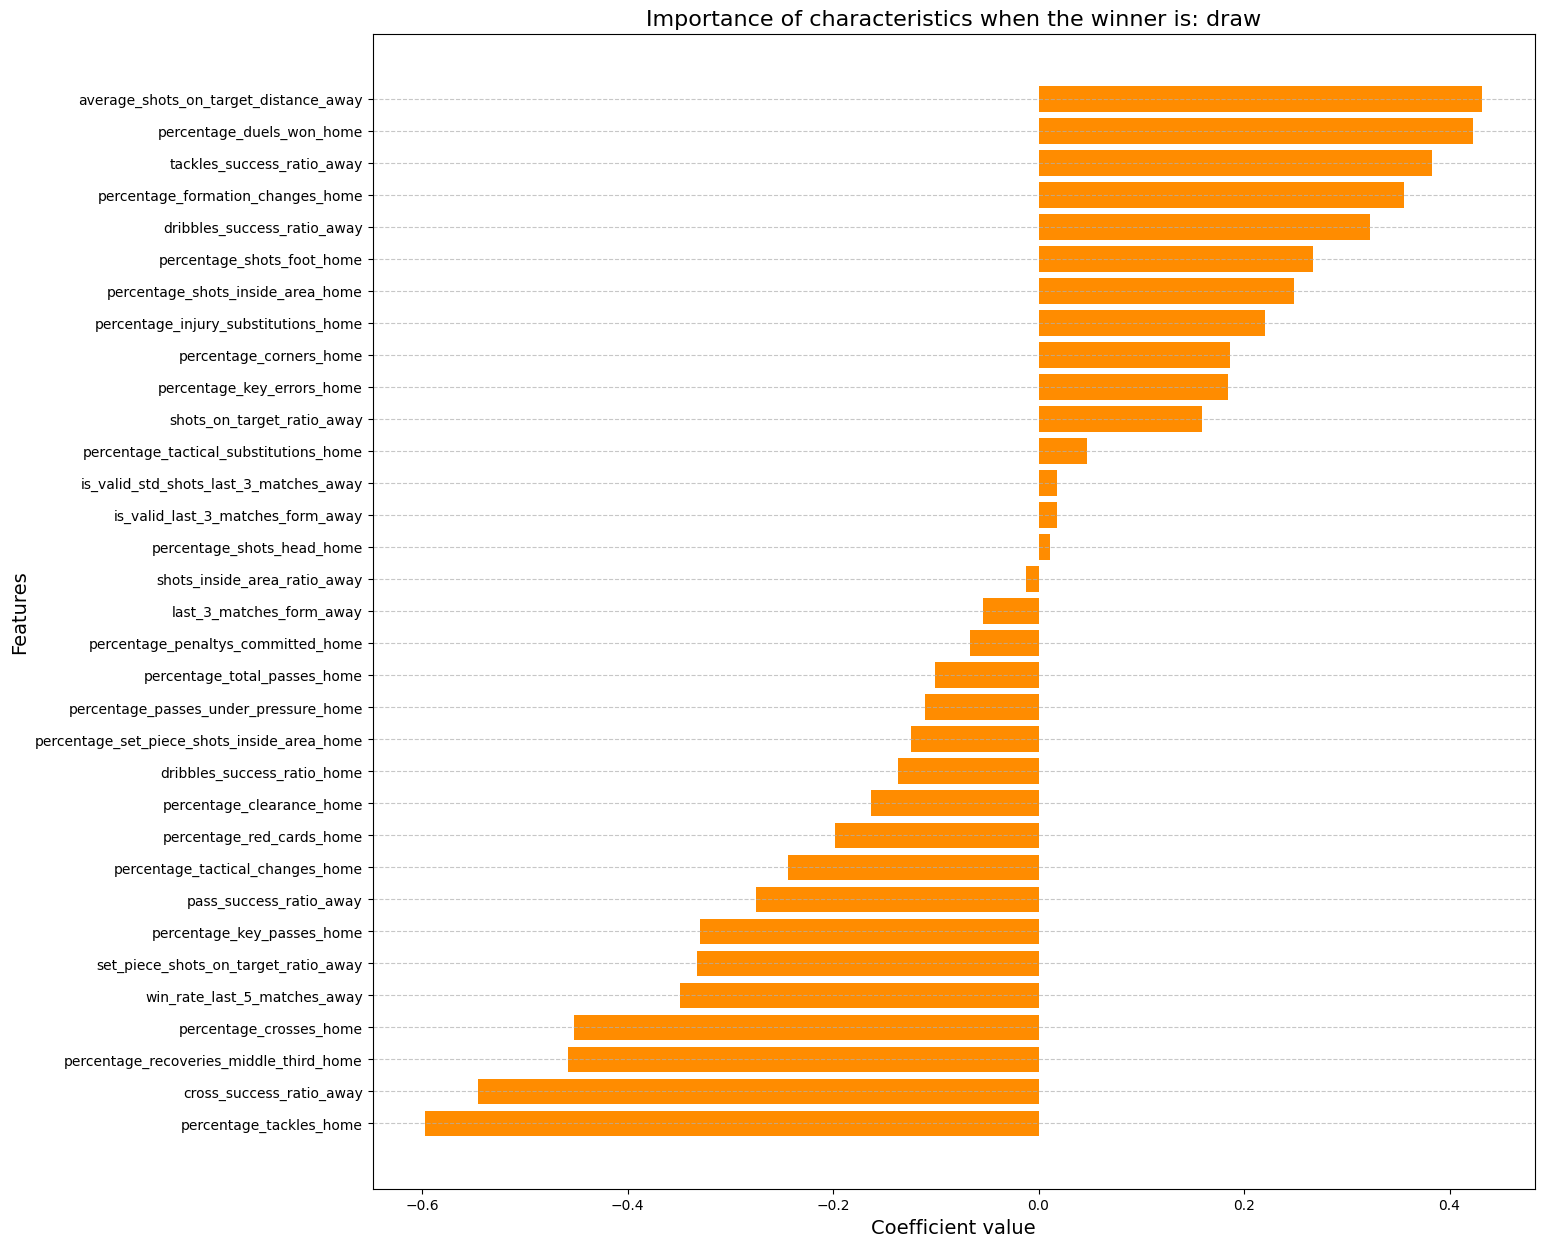

Class 2: ['home_team']
Features with zero importance for class home_team:
['shots_inside_area_ratio_away', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_away', 'dribbles_success_ratio_home', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'is_valid_last_3_matches_form_away', 'win_rate_last_5_matches_away', 'is_valid_std_shots_last_3_matches_away', 'percentage_total_shots_home', 'percentage_key_passes_home', 'percentage_crosses_home', 'percentage_corners_home', 'percentage_penaltys_committed_home', 'percentage_red_cards_home', 'percentage_injury_substitutions_home', 'percentage_players_off_home', 'percentage_passes_under_pressure_home', 'percentage_formation_changes_home']


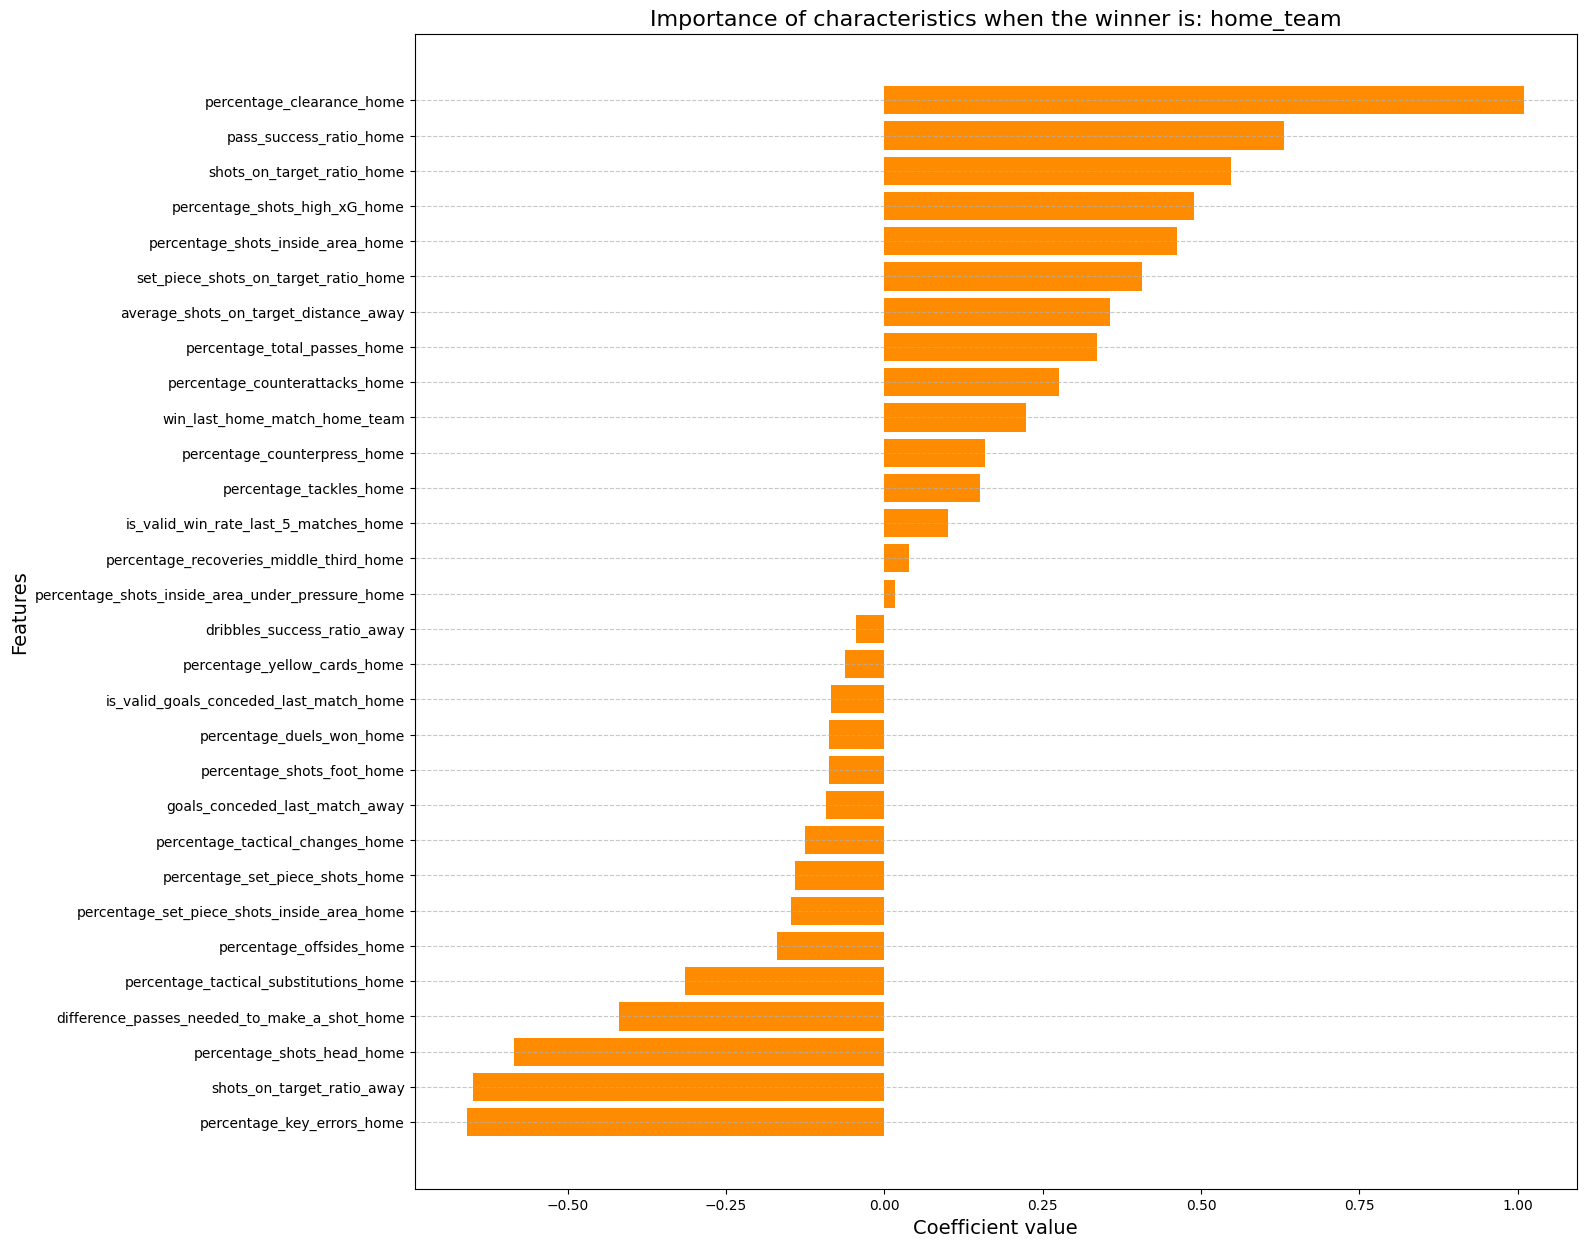

In [4]:
from src.analysis import logistic_regression_global_analysis

logistic_regression_global_analysis(best_model_SerieA, feature_names_reduced_SerieA, encoder_SerieA)

Vamos a analizar estos gráficos:

- **Importancia de características para la victoria del equipo visitante (*away_team*)**: Las características en este gráfico aumentan la probabilidad de que el equipo visitante gane el partido.
    - **Características que favorecen la victoria del equipo visitante**: 📈
        - i
    - **Características que no favorecen la victoria del equipo visitante**: 📉
        - i             
    - **Características que no tienen importancia en la victoria del equipo visitante**:
        - i
    - **Conclusión**: 

- **Importancia de características para el empate (*draw*)**: El empate en un partido suele estar influenciado por un equilibrio en las métricas de ataque y defensa de ambos equipos. Algunas observaciones clave:
    - **Características que favorecen el empate**: 📈
        - i
    - **Características que no favorecen el empate**: 📉
        - i
    - **Características que no tienen importancia en el empate**:
       - i
    - **Conclusión**: 

- **Importancia de características para la victoria del equipo local (*home_team*)**: Las características en este gráfico aumentan la probabilidad de que el equipo local gane el partido.
    - **Características que favorecen la victoria del equipo local**: 📈
        - i
    - **Características que no favorecen la victoria del equipo local**: 📉
        - i
    - **Características que no tienen importancia en la victoria del equipo local**:
        - i
    - **Conclusión**: 

- **Conclusiones generales**: 
    - *Victoria del equipo visitante*: 
    - *Empate*: 
    - *Victoria del equipo local*: 
    - *Factores no determinantes*: 